In [8]:
import pandas as pd
import seaborn as sns
import scipy as sc
import numpy as np
pd.set_option('display.max_columns', None)
sns.set_theme("notebook")

In [9]:
df = pd.read_csv(r'C:\Users\anude\Desktop\Jupyter Notebook Projects\Cricket NSW\Data\T20_Data.csv')

C:\Users\anude\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (0,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df['Release Y'].describe()

KeyError: 'Release Y'

In [3]:
df['wicket'] = 0
df.loc[df['How Out'].isin(['C','B','LB','S']), 'wicket'] = 1

In [4]:
df = df[[
    'wicket'
    , 'Pitch X'
    , 'Pitch Y'
    , 'Ball Speed'
    , 'At Stumps X'
    , 'At Stumps Y'
    , 'Movement In Air'
    , 'Movement Off Pitch'
    , 'Bounce Angle'
    , 'Bounce Angle Delta'
    , 'Drop Angle'
    , 'Bowler Style'
    , 'Bowler Hand'
    , 'Striker Hand'
    , 'Match Id'
    , 'MatchInnings'
    , 'Over'
    , 'Ball In Over'
]]

In [5]:
df = df.loc[
            (df['Ball Speed'] >= 80)
            & (df['Ball Speed'] <= 160)
            & (df['Movement In Air'] <= 5)
            & (df['Movement In Air'] >= -5)
            & (df['Movement Off Pitch'] <= 5)
            & (df['Movement Off Pitch'] >= -5)
            & (df['Bounce Angle']<=15)
            & (df['Bounce Angle Delta']<=8)
            & (df['Bounce Angle Delta']!=80)
            & (df['Drop Angle']!=0)
            & (df['Drop Angle']<=-8)
            & (df['Drop Angle']>=-20)
            & (df['Bowler Style']!='Unknown')
            & (df['Pitch X'] <=1525)
            & (df['Pitch X'] >=-1525)
            & (df['Pitch Y'] <= 13000)
            & (df['Pitch Y'] >= -2000)
            & (df['At Stumps Y']>=0)
            & (df['At Stumps Y']<=2000)
                ]\
                .reset_index(drop=True)

In [8]:
df = df.sort_values(by=['Match Id', 'MatchInnings', 'Over', 'Ball In Over']).reset_index(drop=True)

In [38]:
pitch_x_buckets = np.arange(-1500,1650,100)

In [39]:
pitch_x_buckets

array([-1500, -1400, -1300, -1200, -1100, -1000,  -900,  -800,  -700,
        -600,  -500,  -400,  -300,  -200,  -100,     0,   100,   200,
         300,   400,   500,   600,   700,   800,   900,  1000,  1100,
        1200,  1300,  1400,  1500,  1600])

In [47]:
df['Pitch X Bins'] = pd.cut(df['Pitch X'], pitch_x_buckets, labels=range(len(pitch_x_buckets)-1))

In [48]:
df[['Pitch X','Pitch X Bins']]

,Pitch X,Pitch X Bins
0,261,17
1,320,18
2,-57,14
3,1019,25
4,548,20
...,...,...
182898,760,22
182899,861,23
182900,763,22
182901,1049,25


In [43]:
pd.get_dummies(df['Pitch X Bins'])

,"(-1500, -1400]","(-1400, -1300]","(-1300, -1200]","(-1200, -1100]","(-1100, -1000]","(-1000, -900]","(-900, -800]","(-800, -700]","(-700, -600]","(-600, -500]","(-500, -400]","(-400, -300]","(-300, -200]","(-200, -100]","(-100, 0]","(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]","(900, 1000]","(1000, 1100]","(1100, 1200]","(1200, 1300]","(1300, 1400]","(1400, 1500]","(1500, 1600]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
182899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
182900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
182901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
pitch_y_buckets = np.arange(-2000,13250,250)

In [27]:
at_stumps_x_buckets = np.arange(-1750,2250,100)

In [28]:
at_stumps_x_buckets

array([-1750, -1650, -1550, -1450, -1350, -1250, -1150, -1050,  -950,
        -850,  -750,  -650,  -550,  -450,  -350,  -250,  -150,   -50,
          50,   150,   250,   350,   450,   550,   650,   750,   850,
         950,  1050,  1150,  1250,  1350,  1450,  1550,  1650,  1750,
        1850,  1950,  2050,  2150])

In [36]:
at_stumps_y_buckets = np.arange(0,2100,100)

In [37]:
at_stumps_y_buckets

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])

In [29]:
df['At Stumps Y'].describe()

count    182903.000000
mean        758.868384
std         308.305169
min           0.000000
25%         584.000000
50%         738.000000
75%         911.000000
max        2000.000000
Name: At Stumps Y, dtype: float64

<Axes: ylabel='At Stumps Y'>

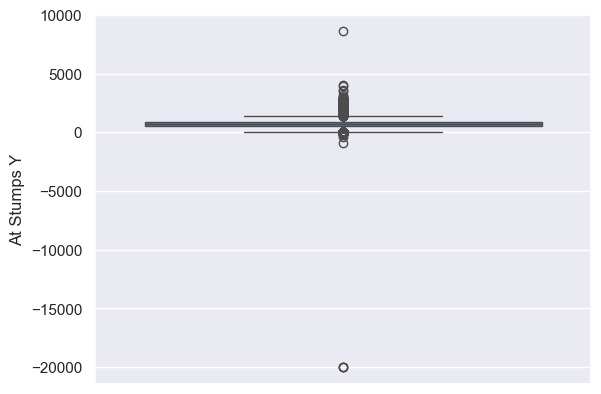

In [33]:
sns.boxplot(df['At Stumps Y'])

<Axes: xlabel='wicket', ylabel='Bounce Angle Delta'>

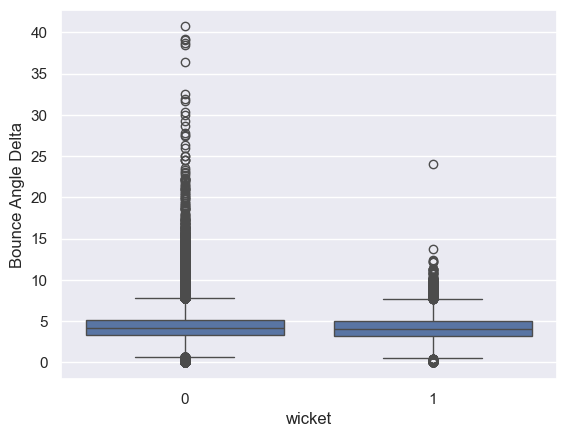

In [55]:
sns.boxplot(data=df,x='wicket',y='Bounce Angle Delta')

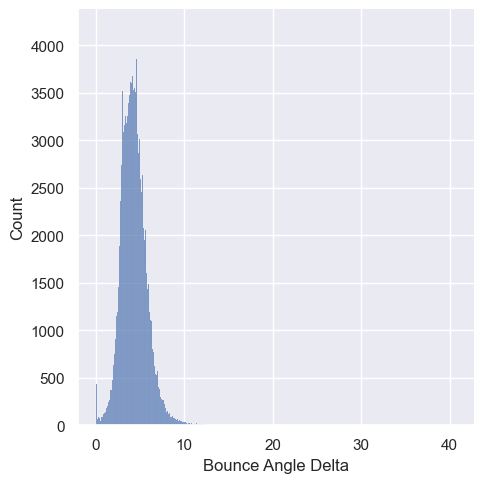

In [30]:
sns.displot(df['Bounce Angle Delta'])

In [44]:
df.loc[df['Drop Angle']!=0]['Drop Angle'].quantile(0.1)

-16.98

In [27]:
df['Drop Angle'].describe()

count    199560.000000
mean        -13.879170
std           2.640855
min         -55.010000
25%         -15.730000
50%         -13.840000
75%         -11.950000
max           0.000000
Name: Drop Angle, dtype: float64

## High Level Stats

In [9]:
print(f"There have been {df['Match Id'].nunique()} matches in this dataset, with a total of {df['wicket'].sum()} wickets taken, which is an average of {df['wicket'].sum()/df['Match Id'].nunique()} per match")

There have been 873 matches in this dataset, with a total of 9222 wickets taken, which is an average of 10.563573883161512 per match


In [10]:
df.groupby(['Match Id', 'MatchInnings']).agg({'wicket':'sum'}).reset_index().groupby(['MatchInnings']).agg({'wicket':'mean'}).reset_index()

,MatchInnings,wicket
0,1,5.536165
1,2,5.222090
2,3,0.666667
3,4,0.500000


<Axes: xlabel='wicket', ylabel='Match Id'>

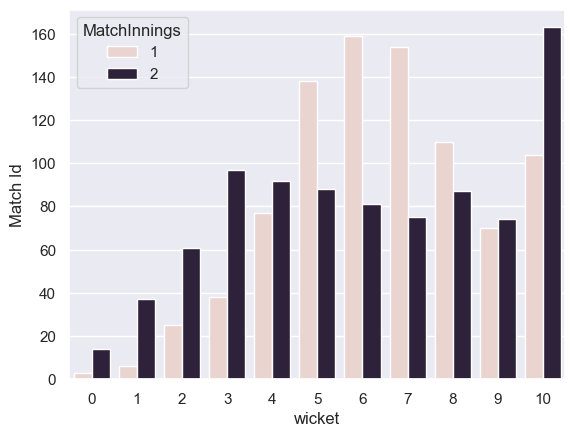

In [96]:
sns.barplot(data=df.loc[df['MatchInnings']<=2].groupby(['Match Id', 'MatchInnings']).agg({'wicket':'sum'}).reset_index().groupby(['wicket','MatchInnings']).agg({'Match Id':'count'}).reset_index(),x='wicket',y='Match Id',hue='MatchInnings')

## P(Wicket)

In [12]:
df['wicket'].describe()

count    182903.000000
mean          0.050420
std           0.218811
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: wicket, dtype: float64

In [15]:
df.groupby(['Bowler Style']).agg({'wicket':'mean'})

,wicket
Bowler Style,
Fast,0.053632
Fast-Medium,0.053747
Medium,0.051114
Orthodox,0.042609
Wrist,0.048502


## P(Wicket) | Innings

In [98]:
df.loc[df['MatchInnings']<=2].groupby(['MatchInnings']).agg({'wicket':'sum'})/df.loc[df['MatchInnings']<=2].groupby(['MatchInnings']).agg({'wicket':'count'})

,wicket
MatchInnings,
1,0.053555
2,0.054572


## P(Wicket) | Venue

<Axes: >

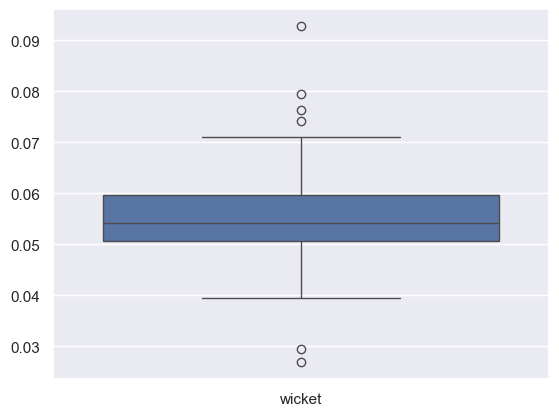

In [99]:
sns.boxplot(df.groupby(['Venue']).agg({'wicket':'sum'})/df.groupby(['Venue']).agg({'wicket':'count'}))

In [100]:
(df.groupby(['Venue']).agg({'wicket':'sum'})/df.groupby(['Venue']).agg({'wicket':'count'})).reset_index().sort_values(by='wicket',ascending=False)

,Venue,wicket
96,VCA Stadium Nagpur,0.092784
92,Traeger Park,0.079498
36,Headingley - Leeds,0.076305
62,North Sydney Oval,0.074074
30,Edgbaston,0.071028
...,...,...
61,Newlands - Cape Town,0.042194
83,St George's Park,0.040816
55,Multan Cricket Stadium,0.039526
78,Seddon Park,0.029412


## P(Wicket) | Dot Balls

In [101]:
df['Total Runs'] = df['Bat Score'] + df['Wides'] + df['Noballs'] + df['Byes'] + df['Legbyes']

In [103]:
def probability_after_dot_balls(df, num_dot_balls):
    """
    Calculate the probability of a wicket falling after a given number of consecutive dot balls.

    Args:
    - df (pd.DataFrame): The cricket dataset with columns 'Match ID', 'innings', 'over', 'ball', 'runs', 'wicket'.
    - num_dot_balls (int): The number of consecutive dot balls to consider.

    Returns:
    - float: The probability of a wicket falling after the specified number of dot balls.
    """
    # Step 1: Sort the data
    df = df.sort_values(by=['Match Id', 'MatchInnings', 'Over', 'Ball In Over'])

    # Step 2: Create a flag for dot balls
    df['dot_ball'] = (df['Total Runs'] == 0).astype(int)

    # Step 3: Identify sequences of num_dot_balls consecutive dot balls
    df[f'{num_dot_balls}_consecutive_dots'] = (
        df.groupby(['Match Id', 'MatchInnings'])['dot_ball']
        .apply(lambda x: sum(x.shift(i, fill_value=0) for i in range(num_dot_balls)) == num_dot_balls)
    )

    # Step 4: Identify deliveries following the sequences
    df['after_consecutive_dots'] = df.groupby(['Match Id', 'MatchInnings'])[f'{num_dot_balls}_consecutive_dots'].shift(1, fill_value=False)

    # Step 5: Filter for these deliveries
    filtered_df = df[df['after_consecutive_dots']]

    # Step 6: Calculate the probability of a wicket falling
    probability_of_wicket = filtered_df['wicket'].mean()

    return probability_of_wicket

In [107]:
results_dict = {}
for dot_balls in range(1,12):
    results_dict[dot_balls] = probability_after_dot_balls(df,dot_balls)

In [108]:
results_dict

{1: 0.05361121092346389,
 2: 0.05015496258220576,
 3: 0.04755877034358047,
 4: 0.042787286063569685,
 5: 0.042693661971830985,
 6: 0.04296160877513711,
 7: 0.0423572744014733,
 8: 0.06319702602230483,
 9: 0.06818181818181818,
 10: 0.06153846153846154,
 11: 0.0}

## P(Wicket) | Wicket

In [122]:
def probability_wicket_within_x_deliveries(df, num_deliveries):
    """
    Calculate the probability of a wicket falling within x deliveries after another wicket.
    
    Args:
    - df (pd.DataFrame): Cricket data with 'Match ID', 'innings', 'over', 'ball', 'wicket'.
    - num_deliveries (int): Number of deliveries to check after a wicket.

    Returns:
    - float: Probability of a wicket falling within x deliveries after another wicket.
    """
    # Step 1: Sort and reset index for proper ordering
    df = df.sort_values(by=['Match Id', 'MatchInnings', 'Over', 'Ball In Over']).reset_index(drop=True)
    
    # Step 2: Initialize a column to track if a wicket occurs within x deliveries
    df['wicket_within_x'] = 0

    # Step 3: Group by match and innings
    for (match_id, innings), group in df.groupby(['Match Id', 'MatchInnings']):
        # Find indices where a wicket occurs
        wicket_indices = group[group['wicket'] == 1].index
        
        # For each wicket, flag the next `x` deliveries
        for idx in wicket_indices:
            next_indices = range(idx + 1, idx + 1 + num_deliveries)
            # Ensure indices are within the bounds of the group
            valid_indices = [i for i in next_indices if i < group.index[-1] + 1]
            df.loc[valid_indices, 'wicket_within_x'] = 1
    
    # Step 4: Filter rows flagged within x deliveries
    filtered_df = df[df['wicket_within_x'] == 1]
    
    # Step 5: Calculate probability of a wicket
    if not filtered_df.empty:
        probability_of_wicket = filtered_df['wicket'].mean()
    else:
        probability_of_wicket = 0  # No wickets within x deliveries
    
    return probability_of_wicket


In [123]:
results_dict = {}
for dot_balls in range(1,6):
    results_dict[dot_balls] = probability_wicket_within_x_deliveries(df,dot_balls)

In [124]:
results_dict

{1: 0.051277199621570485,
 2: 0.050639710909268484,
 3: 0.05217216141811589,
 4: 0.052332077432766015,
 5: 0.052627065960685115}

## P(Wicket) | Over

Text(0, 0.5, 'Average Wickets')

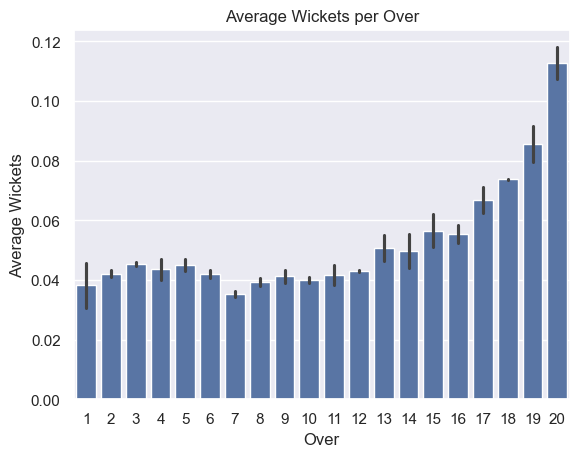

In [7]:
ax = sns.barplot(data=df.loc[df['MatchInnings']<=2].groupby(['MatchInnings', 'Over']).agg({'wicket':'mean'}).reset_index(),x='Over',y='wicket')
ax.set_title('Average Wickets per Over')
ax.set_ylabel('Average Wickets')